## Characterizing wasteful BPD overtime practices


Looking at officer overtime

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
special_events = pd.read_excel('../data/Overtime/Special_Events_Overtime_2012_-_2022.xlsx')
special_events.head

<bound method NDFrame.head of           ID                NAME   RANK  ASSIGNED  \
0      11735        Sanchez,Rene    Ptl     47120   
1      10127    Scannell,Sean P.    Ptl     47120   
2       8677       Maloof,John G    Det     20020   
3       8875           Moy,Homer    Det     20020   
4      10186  Parlon,William Leo    Det     24104   
...      ...                 ...    ...       ...   
13403  10077     Meade,William M  Lieut     48110   
13404   9307     Watson,Denise K    Ptl     47000   
13405   8355   Crossen,Patrick J   Capt     47000   
13406  10293    Naughton,James P    Ptl     47000   
13407   8356     Meade,Stephen M  LtDet     23100   

                     ASSIGNED_DESC  CHARGED    CHARGED_DESC     OTDATE  \
0                      CANINE UNIT    48110  SPECIAL EVENTS 2012-01-01   
1                      CANINE UNIT    48110  SPECIAL EVENTS 2012-01-01   
2                CIVIL RIGHTS UNIT    48110  SPECIAL EVENTS 2012-01-01   
3                CIVIL RIGHTS UNIT   

In [4]:
# Import Data
overtime12 = pd.read_excel('../data/Overtime/2012_Details.xlsx')
overtime13 = pd.read_excel('../data/Overtime/2013_Details.xlsx')
overtime14 = pd.read_excel('../data/Overtime/2014_Details.xlsx')
overtime15 = pd.read_excel('../data/Overtime/2015_Details.xlsx')
overtime16 = pd.read_excel('../data/Overtime/2016_Details.xlsx')
overtime17 = pd.read_excel('../data/Overtime/2017_Details.xlsx')
overtime18 = pd.read_excel('../data/Overtime/2018_Details.xlsx')
overtime19 = pd.read_excel('../data/Overtime/2019_Details.xlsx')
overtime20 = pd.read_excel('../data/Overtime/2020_Details.xlsx')
overtime21 = pd.read_excel('../data/Overtime/2021_Details.xlsx')

c:\Users\opres\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [5]:
# overtime = pd.concat([overtime12, overtime13, overtime14, overtime15, overtime16, overtime17, overtime18, overtime19, overtime20, overtime21])

overtime = pd.concat([overtime14, overtime15, overtime16, overtime17, overtime18, overtime19, overtime20, overtime21])

In [6]:
overtime_court12 = pd.read_excel('../data/Overtime/Court_Overtime_2012_-_2014.xlsx', '2012')
overtime_court13 = pd.read_excel('../data/Overtime/Court_Overtime_2012_-_2014.xlsx', '2013')
overtime_court14 = pd.read_excel('../data/Overtime/Court_Overtime_2012_-_2014.xlsx', '2014')
overtime_court15 = pd.read_excel('../data/Overtime/Court_Overtime_2015_-_2017.xlsx', '2015')
overtime_court16 = pd.read_excel('../data/Overtime/Court_Overtime_2015_-_2017.xlsx', '2016')
overtime_court17 = pd.read_excel('../data/Overtime/Court_Overtime_2015_-_2017.xlsx', '2017')
overtime_court18 = pd.read_excel('../data/Overtime/Court_Overtime_2018_-_2020.xlsx', '2018')
overtime_court19 = pd.read_excel('../data/Overtime/Court_Overtime_2018_-_2020.xlsx', '2019')
overtime_court20 = pd.read_excel('../data/Overtime/Court_Overtime_2018_-_2020.xlsx', '2020')
overtime_court21 = pd.read_excel('../data/Overtime/Court_Overtime_2021_-_2022_ytd.xlsx', '2021')
overtime_court22 = pd.read_excel('../data/Overtime/Court_Overtime_2021_-_2022_ytd.xlsx', '2022 ytd')
# Oct 26th is the last date in 2022 data 

overtime_police_record = pd.read_excel('../data/Overtime/Police_Record_Request_Jan_2019_to_present.xlsx')
earnings21 = pd.read_csv('../data/Earnings/finalconsolidatedcy22earnings_feb2023.xlsx-sheet1.csv')


In [7]:
overtime_court = pd.concat([overtime_court12, overtime_court13, overtime_court14, 
overtime_court15, overtime_court16, overtime_court17, overtime_court18, overtime_court19, 
overtime_court20, overtime_court21, overtime_court22])

### Overtime and Overtime_court can be merged by Emp.ID and ID

### But earnings data has no ID so matching by name seems like the best way

### I think Rank in overtime data has close relationship with Title.

In [8]:
overtime21.head()

,Tracking_No,Emp. ID,Employee,Rank,Street,xStreet,Detail\nDate,Start\nTime,End \nTime,Hours\nWorked,Hours\nPaid,Type,Customer No.,Customer,Customer Address,Customer Address 1,Customer Address 3,Customer_City,Customer_State,Customer_zip
0,2343189,140298,"GARNEY,BRIAN",9,NEW CHARDON ST,NaN,2021-01-02,700,800,100,4.0,C,2838,"MORIARTY, JOHN & ASSOC",3 CHURCH STREET,NaN,NaN,WINCHESTER,MA,01890
1,2343190,10264,"GAVA,ROY",9,NEW CHARDON ST,NaN,2021-01-02,700,800,100,4.0,C,2838,"MORIARTY, JOHN & ASSOC",3 CHURCH STREET,NaN,NaN,WINCHESTER,MA,01890
2,2338683,9707,"BOYLE,FREDERICK J",9,LOMASNEY WY,NaN,2021-01-02,700,1200,500,8.0,C,2602,TISHMAN CONSTRUCTION CORP,1 FEDERAL ST FL 8,NaN,NaN,BOSTON,MA,02110
3,2340857,116235,"JOSEPH,GREGORY",9,LONGWOOD AV,NaN,2021-01-01,800,1530,730,8.0,S,151,CHILDREN'S HOSPITAL BOSTON,300 LONGWOOD AVENUE,"ATTN:BOB RYAN,SECURITY DEPT",NaN,BOSTON,MA,02115
4,2343951,12253,"BUTLER,BOBBIE",9,BLUE HILL AV,NaN,2021-01-01,900,1500,600,8.0,C,396,NATIONAL GRID,40 SYLVAN ROAD,ATTN: MARY MULRONEY,NaN,WALTHAM,MA,02451


In [9]:
overtime_court21.head()

,ID,NAME,RANK,ASSIGNED_DESC,CHARGED_DESC,OTDATE,OTCODE,DESCRIPTION,STARTTIME,ENDTIME,WRKDHRS,OTHOURS
0,153088,"Chen,Steven",Ptl,DISTRICT 01,DISTRICT 01,2021-01-05,281.0,COURT:CLERK MAG. HRG,900,930,0.50,4.0
1,53603,"Gero,Jarrod A",Det,B-2 DETECTIVES,B-2 DETECTIVES,2021-01-06,283.0,COURT:MOTIONS HRG.,1130,1230,1.00,4.0
2,11716,"McCarthy,Peter L",Det,B-3 DETECTIVES,B-3 DETECTIVES,2021-01-04,286.0,COURT:CASE PREP.,1600,1730,1.50,4.0
3,157666,"Mejia,Karen Y",Ptl,DISTRICT 01,DISTRICT 01,2021-01-04,281.0,COURT:CLERK MAG. HRG,900,930,0.50,4.0
4,12045,"Merricks,Kirk D.",Ptl,DISTRICT 01,DISTRICT 01,2021-01-05,281.0,COURT:CLERK MAG. HRG,900,915,0.25,4.0


In [10]:
overtime_police_record.head(10)

,IDNO6,NAME,RANK,ASSIGNED_DESC,CHARGED_DESC,OTDATE,OTCODE,DESCRIPTION,STARTTIME,ENDTIME,WRKDHRS,OTHOURS
0,10525,"Davin,John J",Capt,SPECIAL OPERATIONS DIVISION,TACTICAL OPERATIONS,2019-01-01,271,ENTRY TEAM,130,600,4.5,4.5
1,10273,"Hosein,Haseeb",Capt,DISTRICT 03,DISTRICT 03,2019-01-01,212,CRIME SCENE INVEST.,315,515,2.0,4.0
2,8368,"Terenzi,Phillip",Capt,OPERATIONS DIVISION,OPERATIONS DIVISION,2019-01-01,325,COMPLETE TOUR ASSIGN,1600,1900,3.0,3.0
3,115669,"Auclair,Richard",Civili,LATENT PRINTS UNIT,LATENT PRINTS UNIT,2019-01-01,261,ADD. WORK ASSIGNED,1700,2000,3.0,3.0
4,113177,"Cardona,Veronica",Civili,OPERATIONS DIVISION,OPERATIONS DIVISION,2019-01-01,261,ADD. WORK ASSIGNED,0,400,4.0,4.0
5,80561,"Collins,Dianna",Civili,OPERATIONS DIVISION,OPERATIONS DIVISION,2019-01-01,111,SICK LEAVE,800,1600,8.0,8.0
6,90489,"Correia,Sylvia L",Civili,OPERATIONS DIVISION,OPERATIONS DIVISION,2019-01-01,112,VACATION LEAVE,1600,0,8.0,8.0
7,143367,"Fredericks,Jennifer",Civili,BRIC,INTELLIGENCE GROUP,2019-01-01,261,ADD. WORK ASSIGNED,900,1700,8.0,8.0
8,99560,"Garcia,Jazdiannet",Civili,OPERATIONS DIVISION,OPERATIONS DIVISION,2019-01-01,261,ADD. WORK ASSIGNED,0,400,4.0,4.0
9,75005,"Green,Derek",Civili,BUILDING SECURITY UNIT,OPERATIONS DIVISION,2019-01-01,261,ADD. WORK ASSIGNED,600,1000,4.0,4.0


In [11]:
earnings21.head()

,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN_EDUCATION,TOTAL_ GROSS,POSTAL
0,"Gavin,Donna M.",Boston Police Department,Police Lieutenant (Det),"53,226.90",NaN,"1,045,845.44",463.52,NaN,NaN,"12,812.39","1,112,348.25",02186
1,"Cassellius,Brenda",Superintendent,Superintendent,"179,109.61",NaN,"417,839.83",NaN,NaN,NaN,NaN,"596,949.44",55419
2,"Dempsey,John",Boston Fire Department,Commissioner (BFD),"133,653.78",NaN,"312,752.53",NaN,NaN,NaN,NaN,"446,406.31",02152
3,"Demesmin,Stanley",Boston Police Department,Police Lieutenant (Det),"145,775.26",NaN,"13,932.92","196,515.25",NaN,"11,880.00","29,155.26","397,258.69",02052
4,"Smith,Sean P",Boston Police Department,Police Lieutenant,"142,535.62",NaN,"18,827.45","142,692.38",NaN,"46,365.00","35,633.88","386,054.33",02186


In [12]:
print(set(earnings21['DEPARTMENT_NAME']))

{'HBI Retirees,et al', 'Boston Police Department', 'West Zone ELC', 'Mattahunt Elementary School', 'BPS Higginson Elementary', 'BPS Boston Comm Leadership Ac', 'BPS Boston Evening Academy', 'BPS Madison Park High', 'BPS Burke High', 'BPS Sumner Elementary', 'BPS Alternative Education HS', 'UP "Unlocking Potential" Acad', 'BPS Boston International HS', 'BPS Mckay Elementary', 'Warren/Prescott K-8', 'BPS Athletics', 'BPS Channing Elementary', 'Comm. for Persons with Disabil', 'Tech Boston Academy', 'Chief Operating Officer', 'Office of Housing', 'BPS Human Resource Team', 'ASD Office Of Labor Relation', 'Young Achievers K-8', 'Public Facilities Department', 'Youth Engagement & Employment', 'BPS Boston School Committee', 'BPS Winthrop Elementary', 'Perry K-8', 'BPS Winship Elementary', 'Early Learning Services', 'BPS Mason Elementary', 'Enrollment Services', 'Assessing Department', 'Immigrant Advancement', 'Office of Diversity', 'BPS Community Academy', 'BPS Health Service', 'BPS Adams El

### How do we deal with missing data?

In [13]:
print('overtime21')
print(overtime21.isnull().sum())

print('overtime_court21')
print(overtime_court21.isnull().sum())

print('earnings21')
print(earnings21.isnull().sum())

overtime21
Tracking_No               0
Emp. ID                   0
Employee                  0
Rank                      0
Street                    0
xStreet               52282
Detail\nDate              0
Start\nTime               0
End \nTime                0
Hours\nWorked             0
Hours\nPaid               0
Type                      0
Customer No.              0
Customer                  0
Customer Address          0
Customer Address 1    47931
Customer Address 3    69097
Customer_City             0
Customer_State            0
Customer_zip              2
dtype: int64
overtime_court21
ID               0
NAME             0
RANK             0
ASSIGNED_DESC    0
CHARGED_DESC     0
OTDATE           0
OTCODE           0
DESCRIPTION      0
STARTTIME        0
ENDTIME          0
WRKDHRS          0
OTHOURS          0
dtype: int64
earnings21
NAME                   0
DEPARTMENT_NAME        0
TITLE                  0
REGULAR              600
RETRO              20112
OTHER               73

# OT of Court Appearance

In [14]:
def get_year(date):
    return(date.year)

overtime_court['year'] = overtime_court['OTDATE'].apply(get_year)

#### Q. How has overtime for court appearances changed year-over-year? 

### Appearnace was decreasing wasovertime since 2012 but after COVID-19 (2020) it is rising year by year.

Text(0, 0.5, 'Appearances')

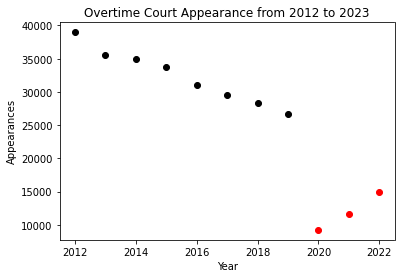

In [15]:
# overtime_court appearance
for i in range(11):
    temp = overtime_court[overtime_court['year']==2012+i]
    if i < 8:
        plt.scatter(2012+i, temp.shape[0], c='black')
    else:
        plt.scatter(2012+i, temp.shape[0], c='red')
    
plt.title('Overtime Court Appearance from 2012 to 2023')
plt.xlabel('Year')
plt.ylabel('Appearances')

# Worked Hours vs Paid Hours (Court Overtime Data)

c:\Users\opres\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Text(0.5, 0, 'Hours')

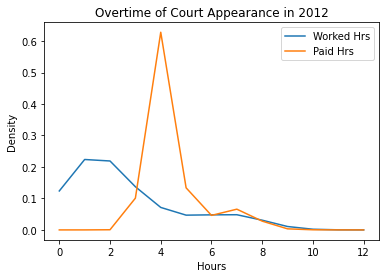

In [16]:
df = pd.DataFrame({
    'Worked Hrs': overtime_court12['WRKDHRS'],
    'Paid Hrs': overtime_court12['OTHOURS'],
})

ax = df.plot.kde(bw_method=0.5, ind=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
plt.title(f'Overtime of Court Appearance in {2012}')
plt.xlabel(f'Hours')

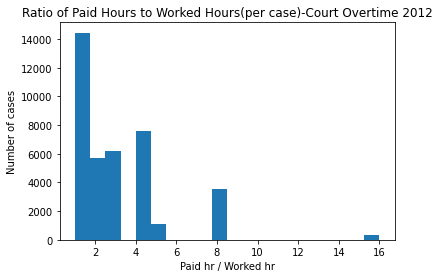

In [17]:
plt.hist(overtime_court12['OTHOURS'] / overtime_court12['WRKDHRS'], bins=20)
plt.title(f'Ratio of Paid Hours to Worked Hours(per case)-Court Overtime {2012}')
plt.xlabel('Paid hr / Worked hr')
plt.ylabel('Number of cases')
plt.show()

# for i in range(11):
#     temp = overtime_court[overtime_court['year']==2012+i]

#     plt.hist(temp['OTHOURS'] / temp['WRKDHRS'], bins=20)
#     plt.title(f'Ratio of Paid Hours to Worked Hours(per case)-Court Overtime {2012+i}')
#     plt.xlabel('Paid hr / Worked hr')
#     plt.ylabel('Number of cases')
#     plt.show()
# per each case

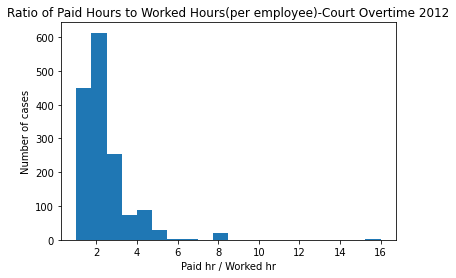

In [18]:
temp_personal = overtime_court12.groupby('ID').sum(['WRKEDHRS', 'OTHOURS'])

plt.hist(temp_personal['OTHOURS'] / temp_personal['WRKDHRS'], bins=20)
plt.title(f'Ratio of Paid Hours to Worked Hours(per employee)-Court Overtime {2012}')
plt.xlabel('Paid hr / Worked hr')
plt.ylabel('Number of cases')
plt.show()

# for i in range(11):
#     temp = overtime_court[overtime_court['year']==2012+i]
#     temp_personal = temp.groupby('ID').sum(['WRKEDHRS', 'OTHOURS'])
#
#     plt.hist(temp_personal['OTHOURS'] / temp_personal['WRKDHRS'], bins=20)
#     # per employee
#     plt.title(f'Ratio of Paid Hours to Worked Hours(per employee)-Court Overtime {2012+i}')
#     plt.xlabel('Paid hr / Worked hr')
#     plt.ylabel('Number of Employees')
#     plt.show()

# Overtime Data
# Hours worked and hours paid are ceratinly different

In [19]:
def get_yyyy(val):
    if isinstance(val, str):
        return(int(val[-4:]))
    elif isinstance(val, int):
        return 0        
    else:
        return(val.year)

overtime['year'] = overtime['Detail\nDate'].apply(get_yyyy)

In [20]:
# overtime.loc[overtime['Hours\nWorked']=='00', ['Hours\nWorked', 'Hours\nPaid']]
def workedhr_to_time(num):
    if num == 0:
        return 0
    time=0
    if num < 10:
        time = pd.to_datetime(num, format='%H')
    else:
        time = pd.to_datetime(num, format='%H%M')
    return time
    
def paidhr_to_time(num):
    if num == 0:
        return 0
    time = pd.to_datetime(num, format='%H')
    return time

overtime.loc[overtime['Hours\nWorked'].isna()] = 0
overtime.loc[overtime['Hours\nPaid'].isna()] = 0

overtime['WRKDHRS'] = overtime['Hours\nWorked'].apply(workedhr_to_time)
overtime['PAIDHRS'] = overtime['Hours\nPaid'].apply(paidhr_to_time)

overtime['Paid - Worked'] = overtime['PAIDHRS'] - overtime['WRKDHRS'] 

# check if all elements are time 
# code crashes if type is int b/c .seconds doesn't work
def time_to_int(time):
    if isinstance(time, int):
        return time
    else:
        return time.seconds / (60 * 60)
    
overtime['Paid - Worked'] = overtime['Paid - Worked'].apply(time_to_int)


Text(0, 0.5, 'Years')

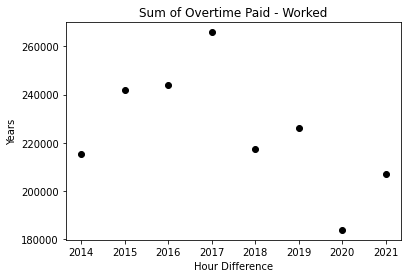

In [21]:
for i in range(2,10):
    temp = overtime[overtime['year']==2012+i]
    # temp = temp.loc[~(temp['WRKDHRS'].isna()) & ~(temp['PAIDHRS'].isna())]

    plt.scatter(2012+i, sum(temp['Paid - Worked']), c='black')
plt.title(f'Sum of Overtime Paid - Worked')
plt.xlabel('Hour Difference')
plt.ylabel('Years')


In [22]:
def workedhr_to_time(num):
    time = pd.to_datetime(num, format='%H%M')
    return time
    
def paidhr_to_time(num):
    time = pd.to_datetime(num, format='%H')
    return time

temp_overtime21['Workedhrs'] = temp_overtime21['Hours\nWorked'].apply(workedhr_to_time)
temp_overtime21['Paidhrs'] = temp_overtime21['Hours\nPaid'].apply(paidhr_to_time)

temp_overtime21['Paid - Worked'] = temp_overtime21['Paidhrs'] - temp_overtime21['Workedhrs'] 

def time_to_int(time):
    return time.seconds / (60 * 60)

temp_overtime21['Paid - Worked'] = temp_overtime21['Paid - Worked'].apply(time_to_int)


NameError: name 'temp_overtime21' is not defined

Text(0, 0.5, 'Number of Records')

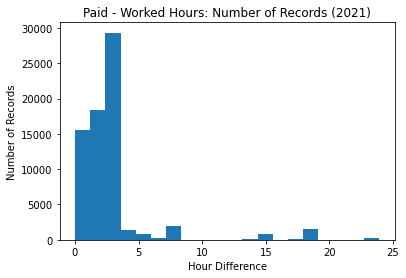

In [ ]:
plt.hist(temp_overtime21['Paid - Worked'], bins=20)
plt.title('Paid - Worked Hours: Number of Records (2021)')
plt.xlabel('Hour Difference')
plt.ylabel('Number of Records')

Text(0, 0.5, 'Number of Officers')

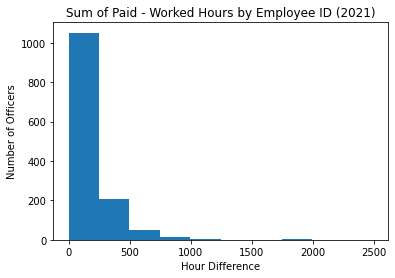

In [ ]:
sum_timediff = temp_overtime21.groupby(['Emp. ID']).sum(['Paid - Worked'])
plt.hist(sum_timediff['Paid - Worked'], bins=10)
plt.title('Sum of Paid - Worked Hours by Employee ID (2021)')
plt.xlabel('Hour Difference')
plt.ylabel('Number of Officers')

# TODO: Need to handle worked hrs and paid hrs for Overtime DAta!!!

In [ ]:
# TODO
# temp_overtime21['Workedhrs'] = temp_overtime21['Workedhrs'].apply(time_to_int)
temp_overtime21['Paidhrs'] = temp_overtime21['Paidhrs'].apply(time_to_int)    

# plt.hist(temp_overtime21['Paidhrs'] / temp_overtime21['Workedhrs'], bins=20)
# plt.title(f'Ratio of Paid Hours to Worked Hours(per case)-Court Overtime {2014}')
# plt.xlabel('Paid hr / Worked hr')
# plt.ylabel('Number of cases')
# plt.show()

In [ ]:
# TODO
temp = overtime[overtime['year']==2014]
plt.hist(temp['OTHOURS'] / temp['WRKDHRS'], bins=20)

# temp = temp.loc[~(temp['WRKDHRS'].isna()) & ~(temp['PAIDHRS'].isna())]

# plt.scatter(2012+i, sum(temp['Paid - Worked']), c='black')
plt.title(f'Sum of Overtime Paid - Worked')
plt.xlabel('Worked Hours')
plt.ylabel('Paid Hours')

## Overtime freq per employee

Text(0, 0.5, 'Number of Officers')

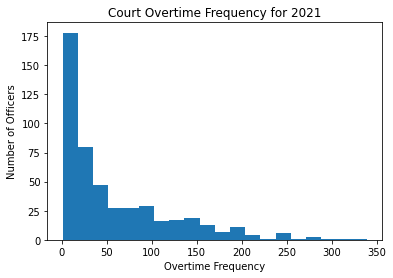

In [ ]:
temp_overtime21 = overtime21.copy()
temp_overtime21.sort_values(by=['Emp. ID', 'Detail\nDate'], inplace=True)
temp_overtime21['count'] = temp_overtime21.groupby('Emp. ID').count().iloc[:, 0]

plt.hist(temp_overtime21['count'], bins=20)
plt.title(f"Court Overtime Frequency for {2021}")
plt.xlabel('Overtime Frequency')
plt.ylabel('Number of Officers')

## OT Difference between hours worked and hours paid

### Any pattern? time of year, location, weekdays/weekends, 

In [ ]:
timediff_list = [100, 250, 500, 1000]

for i in timediff_list:
    total_cnt = sum_timediff.shape[0]
    temp = sum_timediff[sum_timediff['Paid - Worked']>=i]
    ovetime_cnt = temp.shape[0]
    print(f"{ovetime_cnt} Employees have {i}+ hours of Paid - Worked hours is {round(ovetime_cnt / total_cnt * 100, 2)}%")

598 Employees have 100+ hours of Paid - Worked hours is 44.83%
283 Employees have 250+ hours of Paid - Worked hours is 21.21%
77 Employees have 500+ hours of Paid - Worked hours is 5.77%
9 Employees have 1000+ hours of Paid - Worked hours is 0.67%


## Check overtime pay dist
### 'str' and 'float' was mixed in 'OVERTIME'

### TOO many titles... 

In [ ]:
print(set(temp_earnings21['TITLE']))
print(f"{len(set(temp_earnings21['TITLE']))} titles")

{'FF (FPD InspLev2Certification)', 'Chief of Staff', 'Sen Technician 33', 'Police Lieutenant', 'DepFireChiefAdmn-AdvTechnician', 'Construction&DesignServMangr', 'Lieut-Hackney Carriage Inves.', 'Specialist (BTU) non ac', 'Librarian', 'BPS Bi-Wkly 26 Leave non-ac', 'Driver', 'Asst Keeper Of Prints', 'Corporation Counsel', 'HMIS Administrator', 'Collection Agent(Bpd)', 'Confidential Secretary (Fcm)', 'Dir of Personal Property', 'Aquatics Manager', 'Hvy Mtr Equi Repairpr Class II', 'Director of Human Resources', 'Principal Middle', 'Prin Account Clerk 25', 'Social Worker (BPD)', 'Sen Technician (C)', 'Dir-Public Info (Police)', 'Police Sergeant/AcadInstructor', 'Financial Analyst', 'Safety Inspector (C Fleet Mn)', 'Jr Eng Aid', 'Police Sergeant', 'Library Aide', 'Police Officer', 'Spprtng Indgnous Comm Fellow', 'Carpenter', 'Chief Of Staff', 'Sr Data Proc Sys Anl (BTD)', 'Sr. Graphic Designer', 'Supv-Parking Enforcement', 'Digital Director', 'Dir, BosRegIntelCntr (Red-Cir)', 'Sr Budget An

## Check overtime frequency by person

### 1 row per 1 overtime record

In [ ]:
print(f"{len(temp_overtime21['Emp. ID'].unique())} employees submitted {temp_overtime21.shape[0]} overtime requests")

1334 employees submitted 70487 overtime requests


Text(0.5, 1.0, 'Dist of overtime frequency')

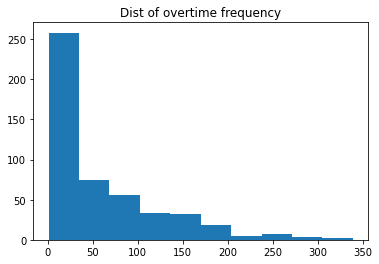

In [ ]:
temp_overtime21['OVERTIME_FREQ'] = temp_overtime21.groupby(['Emp. ID'])['Emp. ID'].count()
plt.hist(temp_overtime21['OVERTIME_FREQ'])
plt.title('Dist of overtime frequency')

In [ ]:
overtime_freq_list = [25, 50, 100, 150, 200]

for i in overtime_freq_list:
    total_cnt = len(temp_overtime21['Emp. ID'].unique())
    temp = temp_overtime21[temp_overtime21['OVERTIME_FREQ']>=i]
    ovetime_cnt = len(temp['Emp. ID'].unique())
    print(f"Employees with {i}+ overtime request is {round(ovetime_cnt / total_cnt * 100, 2)}%")

Employees with 25+ overtime request is 15.52%
Employees with 50+ overtime request is 11.24%
Employees with 100+ overtime request is 7.05%
Employees with 150+ overtime request is 3.75%
Employees with 200+ overtime request is 1.35%


# Earnings data

Text(0.5, 1.0, 'Dist of overtime pay')

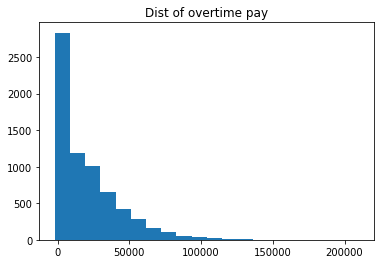

In [ ]:
import locale
locale.setlocale( locale.LC_ALL, 'en_US.UTF-8' ) 

temp_earnings21 = earnings21.copy()

def to_num(x):
    if isinstance(x, str):
        return float(x.replace(',', ''))
    else: 
        return x

temp_earnings21['OVERTIME_int'] = temp_earnings21['OVERTIME'].apply(to_num)

plt.hist(temp_earnings21['OVERTIME_int'], bins=20)
plt.title('Dist of overtime pay')

In [ ]:
print('Num of 0 is', temp_earnings21[temp_earnings21['OVERTIME_int']==0].shape[0])

temp_earnings21.loc[temp_earnings21['OVERTIME_int'].isna(), 'OVERTIME_int'] = 0

print(f'Num of 0 is', temp_earnings21[temp_earnings21['OVERTIME_int']==0].shape[0], f'out of {temp_earnings21.shape[0]}')

plt.hist(temp_earnings21['OVERTIME_int'], bins=20)
plt.title('Dist of overtime pay')

plt.show()

In [ ]:
overtime_list = [5*10**3, 1*10**4, 2.5*10**4, 5*10**4, 1*10**5]

for i in overtime_list:
    total_cnt = temp_earnings21.shape[0]
    ovetime_cnt = temp_earnings21[temp_earnings21['OVERTIME_int']>=i].shape[0]
    print(f"Overtime pay of ${i}+ is {round(ovetime_cnt / total_cnt * 100, 2)}%")

# Frequent overtime users

In [ ]:
# Counting overtime frequency
overtime_freq = pd.concat([overtime17, overtime18, overtime19, overtime20, overtime21])
overtime_freq = overtime_freq[['Tracking_No', 'Emp. ID', 'Employee']]
overtime_freq['overtime_count'] = overtime_freq.groupby('Emp. ID')['Emp. ID'].transform('count')
overtime_freq.drop_duplicates(subset=['Emp. ID', 'Employee'], inplace=True)

# Sort data
overtime_freq.sort_values('overtime_count', ascending=False, inplace=True)

# export data - 2129 employees
overtime_freq.to_csv('frequent overtime users.csv') 

# What is overtime code(OTCODE) & OTHOURS?
### Relationship between OTHOURS and WRKDHRS?

In [ ]:
print(overtime_court21.columns)

print(overtime_court21.loc[:5, ['ID', 'NAME', 'RANK', 'ASSIGNED_DESC', 'CHARGED_DESC', 'OTDATE',
       'OTCODE', 'DESCRIPTION', 'STARTTIME', 'ENDTIME', 'WRKDHRS', 'OTHOURS']])

print(type(overtime_court21['STARTTIME'][0]))

print(type(overtime_court21['WRKDHRS'][0]))

print(type(overtime_court21['OTHOURS'][0]))

Index(['ID', 'NAME', 'RANK', 'ASSIGNED_DESC', 'CHARGED_DESC', 'OTDATE',
       'OTCODE', 'DESCRIPTION', 'STARTTIME', 'ENDTIME', 'WRKDHRS', 'OTHOURS'],
      dtype='object')
       ID                NAME RANK     ASSIGNED_DESC      CHARGED_DESC  \
0  153088         Chen,Steven  Ptl       DISTRICT 01       DISTRICT 01   
1   53603       Gero,Jarrod A  Det  B-2   DETECTIVES  B-2   DETECTIVES   
2   11716    McCarthy,Peter L  Det  B-3   DETECTIVES  B-3   DETECTIVES   
3  157666       Mejia,Karen Y  Ptl       DISTRICT 01       DISTRICT 01   
4   12045    Merricks,Kirk D.  Ptl       DISTRICT 01       DISTRICT 01   
5   11436  Montesino,Miguel E  Det  A-7   DETECTIVES  A-7   DETECTIVES   

      OTDATE  OTCODE           DESCRIPTION  STARTTIME  ENDTIME  WRKDHRS  \
0 2021-01-05   281.0  COURT:CLERK MAG. HRG        900      930     0.50   
1 2021-01-06   283.0    COURT:MOTIONS HRG.       1130     1230     1.00   
2 2021-01-04   286.0      COURT:CASE PREP.       1600     1730     1.50   
3 2021-0

In [ ]:
print(overtime_police_record.head())

    IDNO6              NAME    RANK                ASSIGNED_DESC  \
0   10525      Davin,John J    Capt  SPECIAL OPERATIONS DIVISION   
1   10273     Hosein,Haseeb    Capt                  DISTRICT 03   
2    8368   Terenzi,Phillip    Capt          OPERATIONS DIVISION   
3  115669   Auclair,Richard  Civili           LATENT PRINTS UNIT   
4  113177  Cardona,Veronica  Civili          OPERATIONS DIVISION   

          CHARGED_DESC     OTDATE  OTCODE           DESCRIPTION  STARTTIME  \
0  TACTICAL OPERATIONS 2019-01-01     271            ENTRY TEAM        130   
1          DISTRICT 03 2019-01-01     212   CRIME SCENE INVEST.        315   
2  OPERATIONS DIVISION 2019-01-01     325  COMPLETE TOUR ASSIGN       1600   
3   LATENT PRINTS UNIT 2019-01-01     261    ADD. WORK ASSIGNED       1700   
4  OPERATIONS DIVISION 2019-01-01     261    ADD. WORK ASSIGNED          0   

   ENDTIME  WRKDHRS  OTHOURS  
0      600      4.5      4.5  
1      515      2.0      4.0  
2     1900      3.0      3.0 

# [meaningless] Overtime request frequency by rank 

(array([1., 3., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([ 10. ,  23.1,  36.2,  49.3,  62.4,  75.5,  88.6, 101.7, 114.8,
        127.9, 141. ]),
 <BarContainer object of 10 artists>)

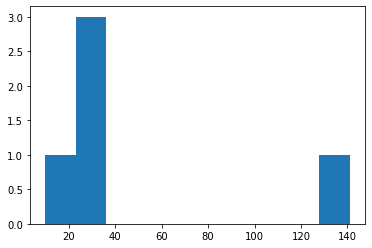

In [ ]:
plt.hist(overtime21[overtime21['Rank']==3]['OVERTIME_FREQ'])

(array([3., 3., 0., 2., 0., 0., 0., 0., 0., 1.]),
 array([  1. ,  16.3,  31.6,  46.9,  62.2,  77.5,  92.8, 108.1, 123.4,
        138.7, 154. ]),
 <BarContainer object of 10 artists>)

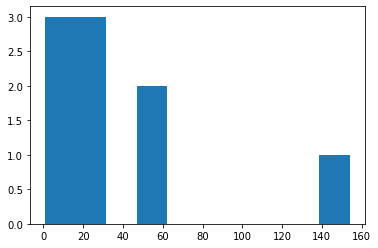

In [ ]:
plt.hist(overtime21[overtime21['Rank']==5]['OVERTIME_FREQ'])

(array([3., 2., 0., 1., 0., 0., 0., 0., 0., 1.]),
 array([  1. ,  15.8,  30.6,  45.4,  60.2,  75. ,  89.8, 104.6, 119.4,
        134.2, 149. ]),
 <BarContainer object of 10 artists>)

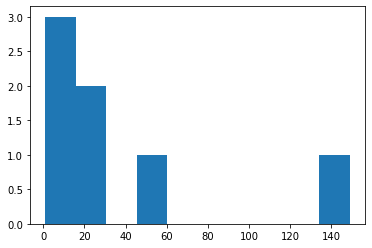

In [ ]:
plt.hist(overtime21[overtime21['Rank']==6]['OVERTIME_FREQ'])

(array([12.,  6.,  2.,  1.,  1.,  1.,  2.,  1.,  2.,  2.]),
 array([  1. ,  22.4,  43.8,  65.2,  86.6, 108. , 129.4, 150.8, 172.2,
        193.6, 215. ]),
 <BarContainer object of 10 artists>)

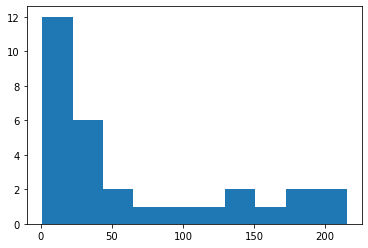

In [ ]:
plt.hist(overtime21[overtime21['Rank']==7]['OVERTIME_FREQ'])

(array([12.,  4.,  1.,  2.,  4.,  0.,  1.,  0.,  2.,  2.]),
 array([  1.,  20.,  39.,  58.,  77.,  96., 115., 134., 153., 172., 191.]),
 <BarContainer object of 10 artists>)

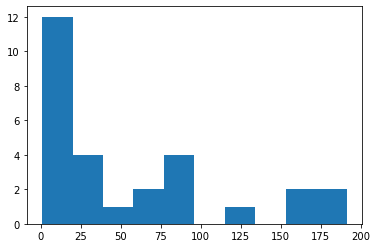

In [ ]:
plt.hist(overtime21[overtime21['Rank']==8]['OVERTIME_FREQ'])

(array([212.,  64.,  49.,  29.,  26.,  14.,   3.,   7.,   3.,   2.]),
 array([  1. ,  34.8,  68.6, 102.4, 136.2, 170. , 203.8, 237.6, 271.4,
        305.2, 339. ]),
 <BarContainer object of 10 artists>)

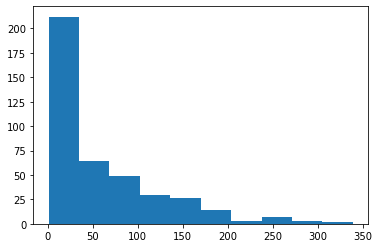

In [ ]:
plt.hist(overtime21[overtime21['Rank']==9]['OVERTIME_FREQ'])